In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy

## [Problem 12-1]
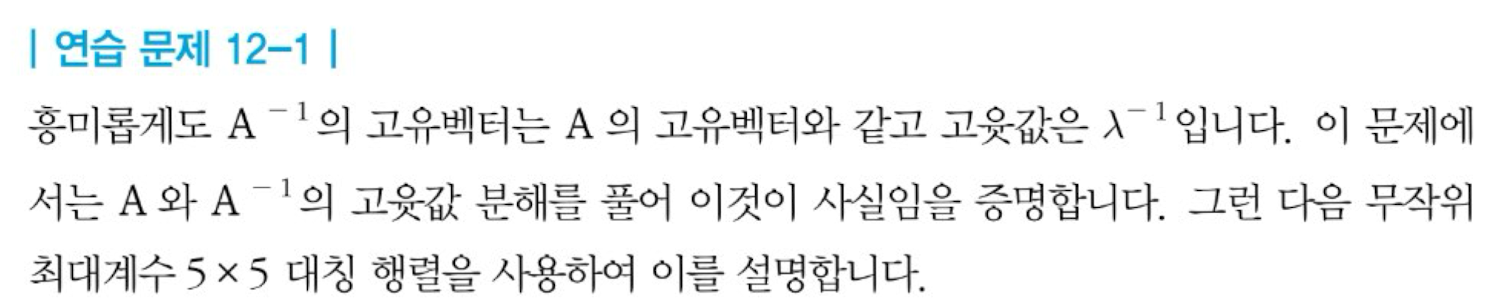

**Properties**
1. $A^{-1}$의 eigenvector = $A$의 eigenvector
2. $A^{-1}$의 eigenvalue = $\lambda^{-1}$

TODO

1. **$A$, $A^{-1}$의 EVD를 통해 증명**

2. **Next, Random 5x5 matrix of full rank를 통해 설명**
---

1. **$A$, $A^{-1}$의 EVD를 통해 증명**

\begin{align}
Let, Ax &= \lambda x \\
(Ax)^{-1} &= (\lambda x)^{-1} \\
x^{-1}A^{-1} &= 1/\lambda \cdot x^{-1} \\
\color{red}x \cdot x^{-1}A^{-1}\color{red}x &= \color{red}x \cdot 1/\lambda \cdot x^{-1}\color{red}x \\
A^{-1}x &= 1/\lambda \cdot x
\end{align}


∴ $A^{-1}$의 eigenvector는 $A$의 eigenvector와 같고, $A^{-1}$의 eigenvalue는 $A$의 eigenvalue의 역수와 같다.



---
2. **Next, Random 5x5 matrix of full rank를 통해 설명**


In [7]:
A = np.random.randn(5, 5)

print(f'rank of A is {np.linalg.matrix_rank(A)}')
print()
print(f'A: \n{A}')

rank of A is 5

A: 
[[-0.43948547  0.21554659  1.3938221  -0.63057889 -0.19409718]
 [ 0.14262454  0.59906028 -0.52783694 -0.02653056  1.11711422]
 [ 0.02603806 -0.82358366  0.58918702 -0.43273836 -0.00398366]
 [-0.15518745 -0.80537178  1.80395426 -0.01883355 -1.05874264]
 [-1.23870742  1.28762216  0.76724171 -0.65023665  0.72757203]]


In [17]:
# A EVD
eval, evec =  np.linalg.eig(A)

# A inv EVD
A_inv = np.linalg.inv(A)
eval_inv, evec_inv =  np.linalg.eig(A_inv)

evec_inv

array([[-0.63526787+0.j        ,  0.5192079 +0.j        ,
         0.41535929-0.26016038j,  0.41535929+0.26016038j,
         0.08417666+0.j        ],
       [-0.35684635+0.j        , -0.3894793 +0.j        ,
         0.24918385+0.08975605j,  0.24918385-0.08975605j,
         0.50665559+0.j        ],
       [ 0.02795769+0.j        , -0.0766401 +0.j        ,
         0.27858846-0.43005671j,  0.27858846+0.43005671j,
        -0.10599699+0.j        ],
       [ 0.65580554+0.j        ,  0.39208041+0.j        ,
         0.53225866+0.j        ,  0.53225866-0.j        ,
        -0.59090869+0.j        ],
       [ 0.19553228+0.j        ,  0.64740117+0.j        ,
         0.08007576-0.37063834j,  0.08007576+0.37063834j,
         0.61303015+0.j        ]])

In [22]:
# Eigenvalue
np.sort(1/eval)[::-1] # 재정렬한 eval

evec_sort = np.round(np.sort(1/eval)[::-1], 5)
evec_inv_sort = np.round(np.sort(eval_inv)[::-1], 5)
evec_sort == evec_inv_sort # 동일 !

# Eigenvector
print(f'1. evec\n{evec_sort}\n\n2.evec_inv\n{evec_inv_sort}')
  # 다만, Numpy 내에서 정렬의 기준, 부호 설정의 기준이 무엇일지..

1. evec
[ 3.02153+0.j       0.47264+0.j       0.39367+1.14642j  0.39367-1.14642j
 -0.65569-0.j     ]

2.evec_inv
[ 3.02153+0.j       0.47264+0.j       0.39367+1.14642j  0.39367-1.14642j
 -0.65569+0.j     ]


---

## [Problem 12-2]
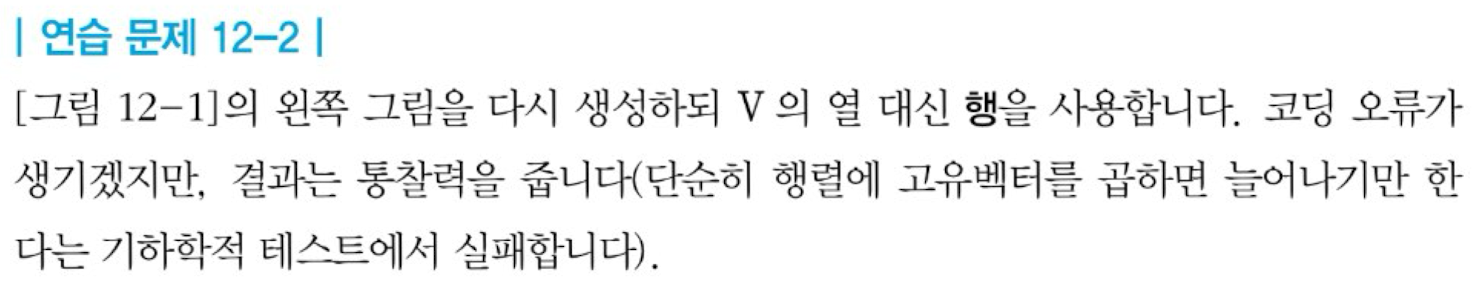

#### [그림 12-1]
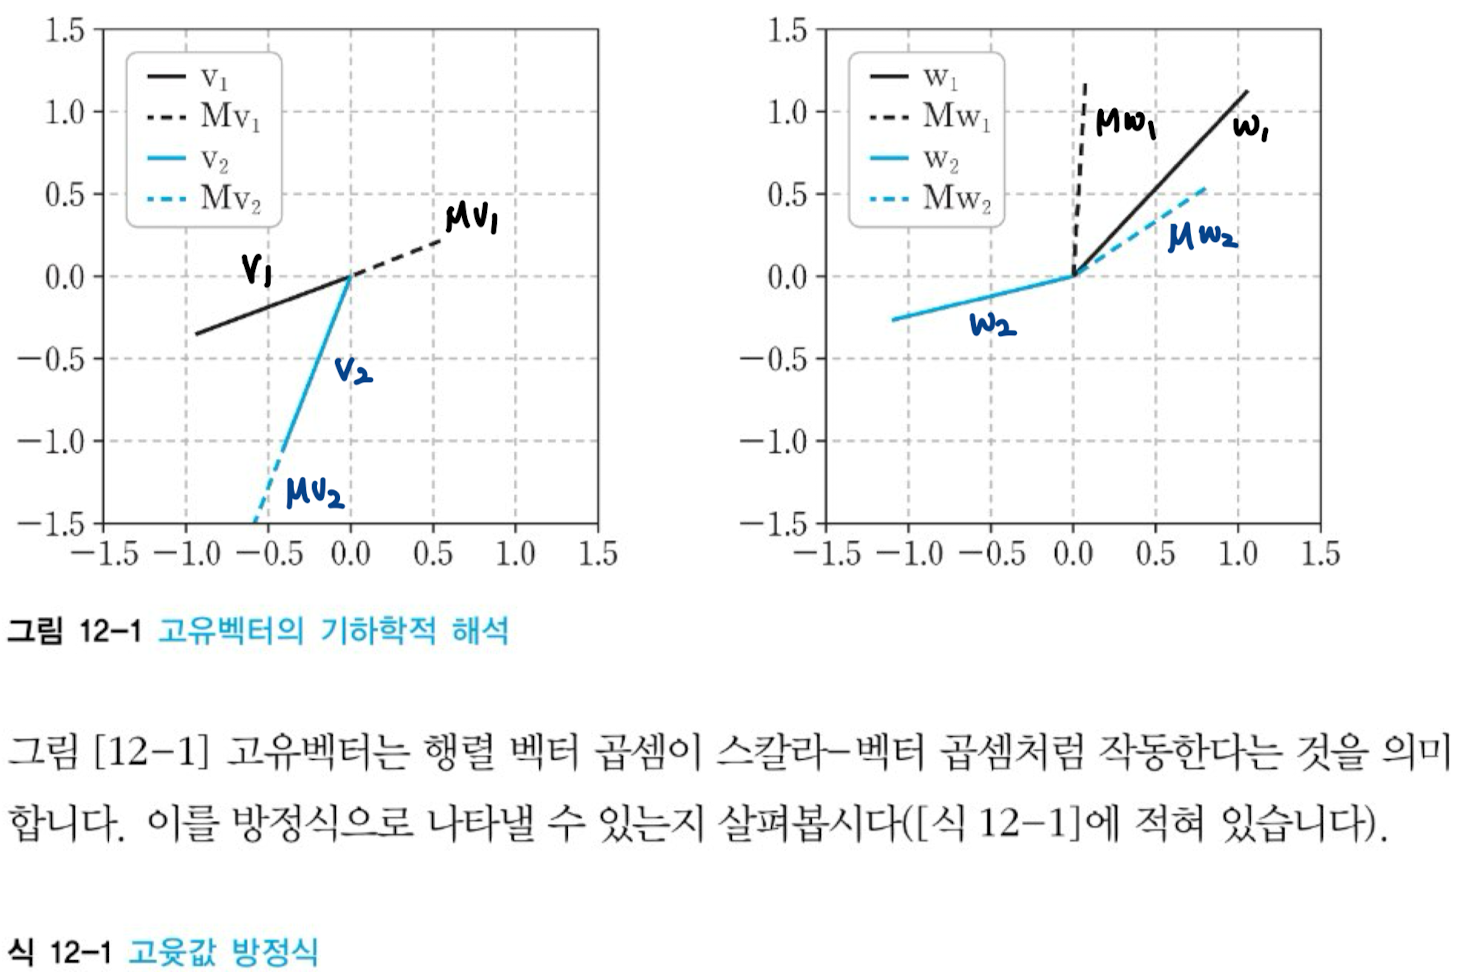

#### [그림 12-1] 시각화

In [26]:
M = np.array([ [-1,1],
               [-1,2] ])

eval, evec = np.linalg.eig(M)
print(eval)

[-0.61803399  1.61803399]


In [28]:
notevec = np.random.randn(2,2)

Mv = M @ evec
Mw = M @ notevec

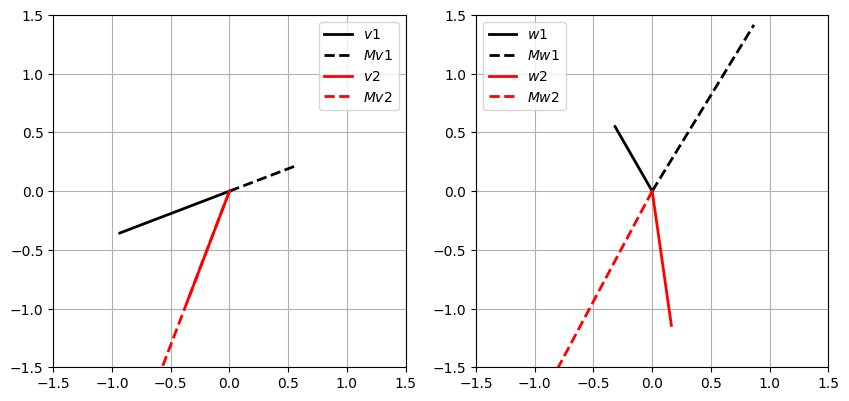

In [29]:
_,axs = plt.subplots(1,2,figsize=(10,6))

# Mv
axs[0].plot([0,evec[0,0]],[0,evec[1,0]],'k',linewidth=2,label='$v1$')
axs[0].plot([0,Mv[0,0]],[0,Mv[1,0]],'k--',linewidth=2,label='$Mv1$')

axs[0].plot([0,evec[0,1]],[0,evec[1,1]],'r',linewidth=2,label='$v2$')
axs[0].plot([0,Mv[0,1]],[0,Mv[1,1]],'r--',linewidth=2,label='$Mv2$')

# Mw
axs[1].plot([0,notevec[0,0]],[0,notevec[1,0]],'k',linewidth=2,label='$w1$')
axs[1].plot([0,Mw[0,0]],[0,Mw[1,0]],'k--',linewidth=2,label='$Mw1$')

axs[1].plot([0,notevec[0,1]],[0,notevec[1,1]],'r',linewidth=2,label='$w2$')
axs[1].plot([0,Mw[0,1]],[0,Mw[1,1]],'r--',linewidth=2,label='$Mw2$')


for i in range(2):
  axs[i].axis('square')
  axs[i].set_xlim([-1.5,1.5])
  axs[i].set_ylim([-1.5,1.5])
  axs[i].grid()
  axs[i].legend()

plt.show()

#### V의 열 대신 행을 활용한 시각화 (그림 12-1의 왼쪽 그림)

In [38]:
Mv = M @ evec
Mw = M @ notevec

array([[-0.93417236, -0.35682209],
       [-0.35682209, -0.93417236]])

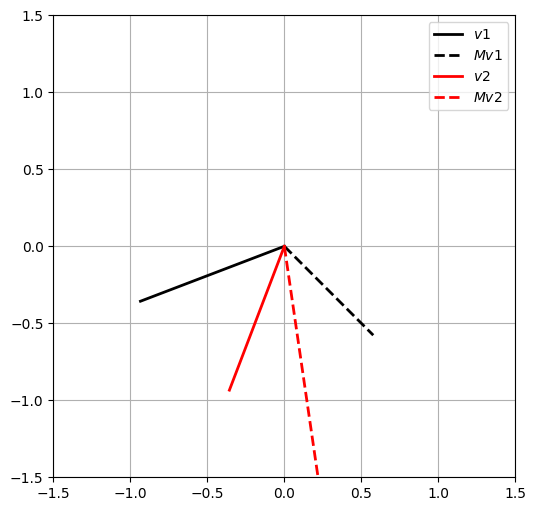

In [39]:
plt.figure(figsize=(10,6))

# Mv
plt.plot([0,evec[0,0]],[0,evec[0,1]],'k',linewidth=2,label='$v1$')
plt.plot([0,Mv[0,0]],[0,Mv[0,1]],'k--',linewidth=2,label='$Mv1$')

# Mw
plt.plot([0,evec[1,0]],[0,evec[1,1]],'r',linewidth=2,label='$v2$')
plt.plot([0,Mv[1,0]],[0,Mv[1,1]],'r--',linewidth=2,label='$Mv2$')



plt.axis('square')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.grid()
plt.legend()

plt.show()

- 행렬의 고윳값은 그 행렬의 열 벡터를 길이만 늘리는 것 (그 행렬의 행 벡터X)

---

## [Problem 12-10]
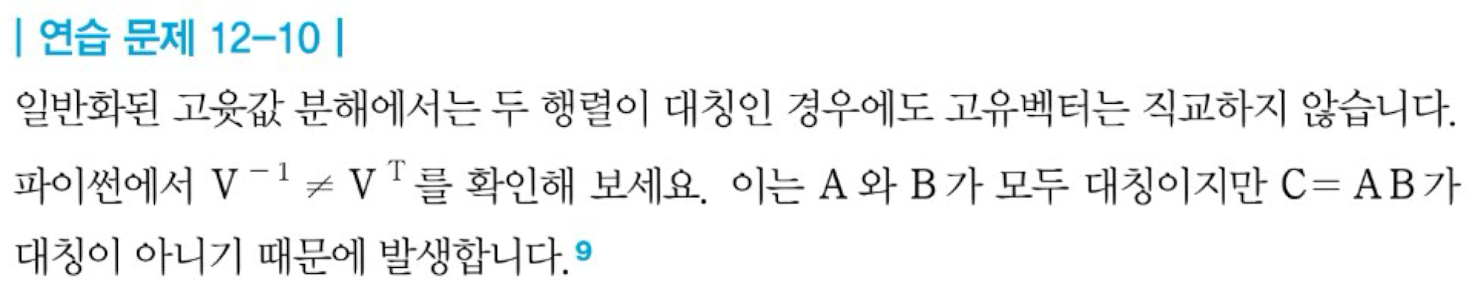
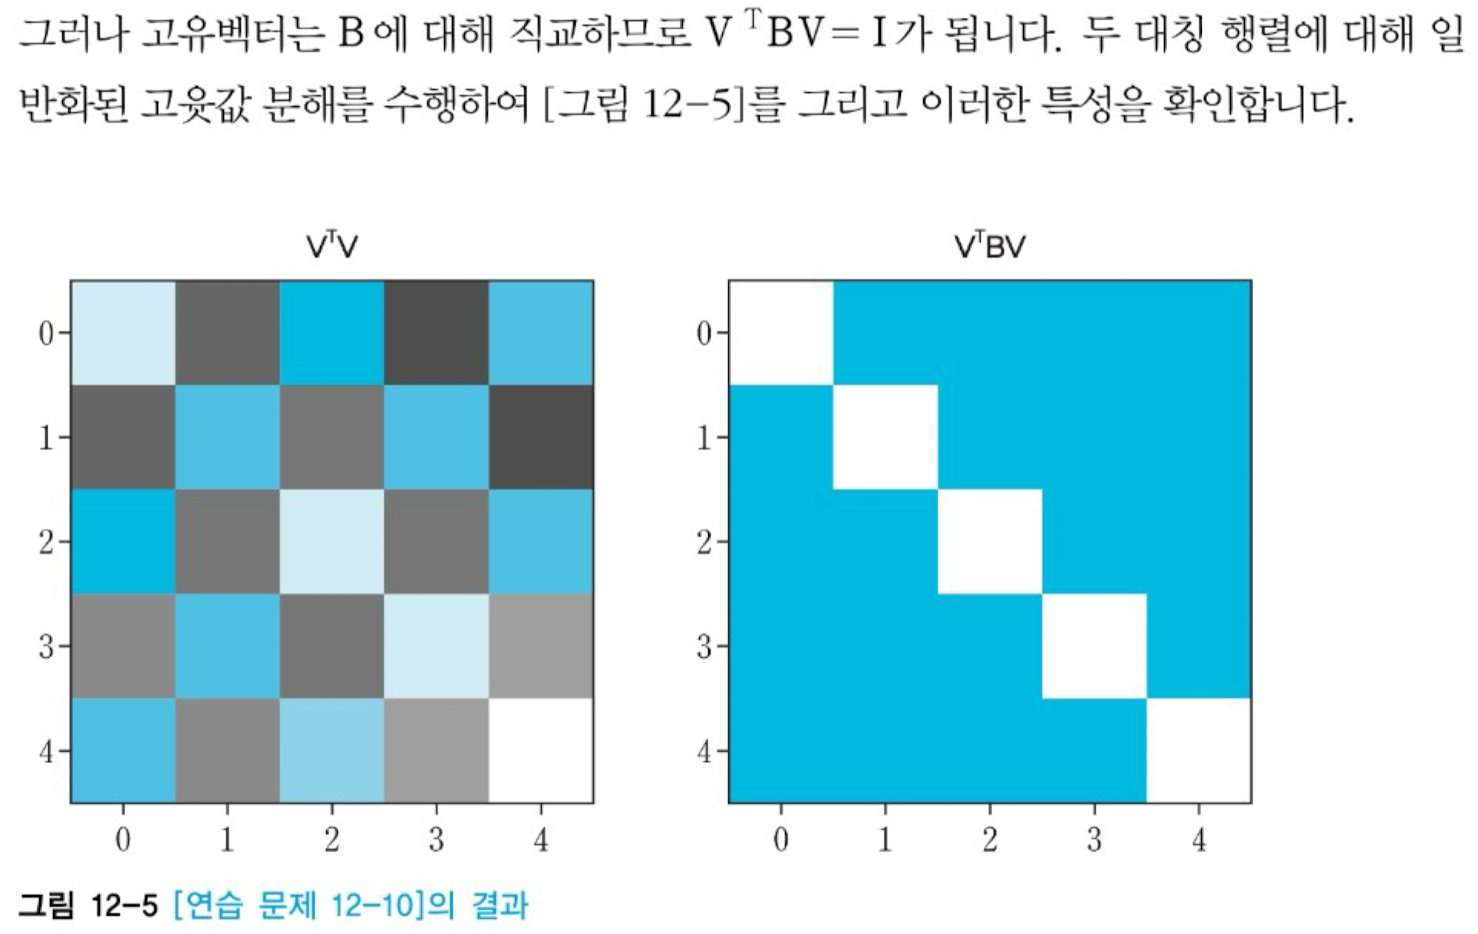

**일반화된 고윳값 분해(GED)**

In [40]:
A = np.random.randn(4, 4)
A = A@A.T

B = np.random.randn(4, 4)
B = B@B.T

In [45]:
lamb, V = scipy.linalg.eigh(A, B) # GED

V_inv = np.linalg.inv(V)
V_T = V.T

print(f'V_inv is \n{V_inv}\n\nV_T is\n{V_T}') # V.T != V_inv

V_inv is 
[[-1.0170986   0.6666952   2.87535456 -2.55533359]
 [ 1.35457813 -0.1897841   3.81451037  1.248826  ]
 [ 0.27810154  0.78194412  0.38726359 -0.10345244]
 [-0.33903281  0.35654686 -0.00993724  0.10189635]]

V_T is
[[-0.11846237 -0.04451595  0.11424945 -0.22724351]
 [-0.01179901 -0.06504724  0.19521426  0.20738752]
 [ 0.94795477  0.98880207 -0.18150243 -0.32356547]
 [-1.86373435  0.6847506   0.2883317   1.24491668]]


책에선 '$A$, $B$는 모두 대칭이지만, $C=AB$가 대칭이 아니기 때문'이라는데,

일단, $C=AB^{-1}$ 아니야?



---



In [48]:
result_1 = V_T @ V
result_2 = V_T @ B @ V

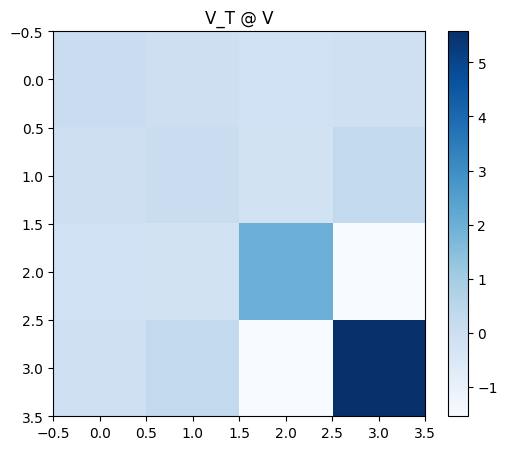

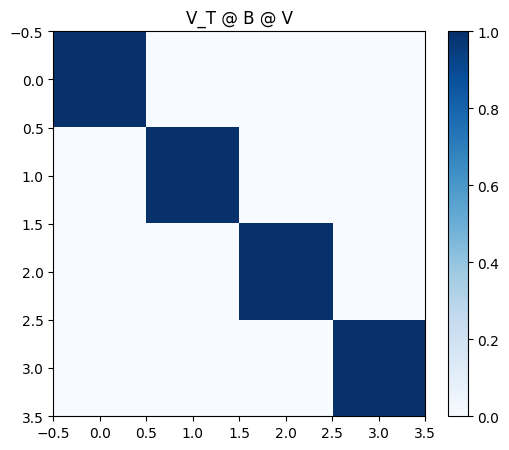

In [53]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(6, 5))
    plt.imshow(matrix, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.show()

plot_heatmap(result_1, "V_T @ V")
plot_heatmap(result_2, "V_T @ B @ V")

## [Problem 12-5]: Shared Problem
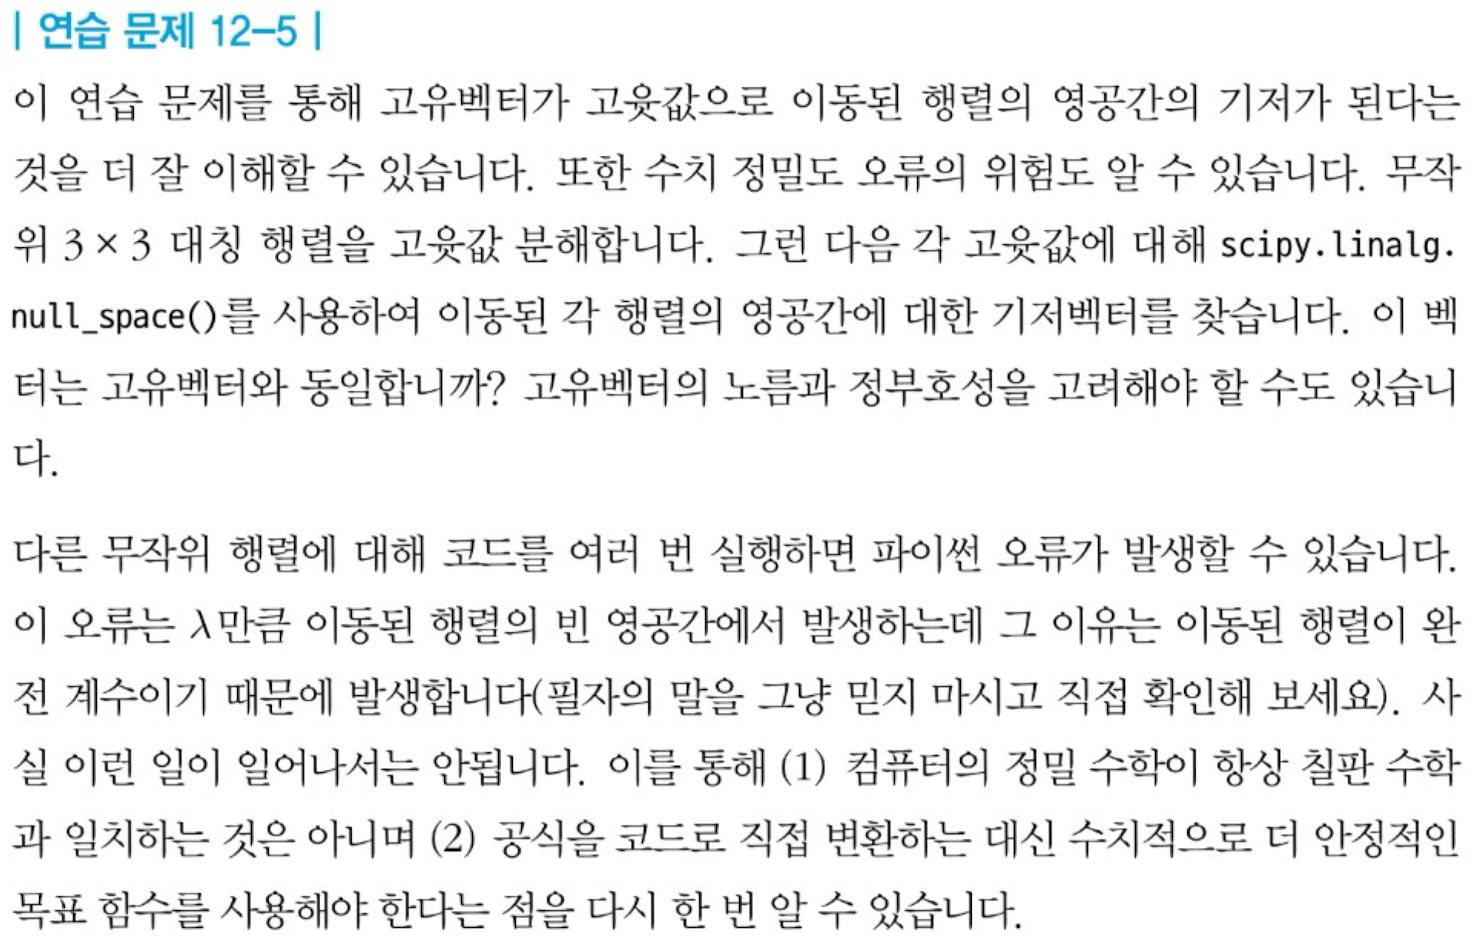

**Goal: evec이 eval로 shifting된 행렬 A의 Null space의 기저라는 것을 이해 (수치 정밀도 오류의 위험도 파악)**
- 즉, evec = $N(A-\lambda I)$'s basis

TODO
1. Random symmetric matrix A (3x3)를 EVD
2. $N(A-\lambda I)$'s basis를 찾아라.
  - Use, `scipy.linalg.null_space()`
  - evec의 norm, definiteness를 고려

P.S. 다른 Random matrix에 대해 여러 번 실행하면 오류 발생 가능
- Empty Null-space에서 오류 발생 (Shifting matrix가 Full-rank이기 때문에 발생)
- 직접 확인해봐라

In [54]:
tmp = np.random.rand(3, 3)
A = tmp.T @ tmp # A is symmetric
A

array([[1.37683243, 0.73268747, 1.24693976],
       [0.73268747, 0.75108095, 1.15418097],
       [1.24693976, 1.15418097, 1.80725169]])

In [55]:
eval, evec = np.linalg.eig(A)
# eval, evec = np.linalg.eigh(A)

I = np.eye(len(eval))
np.fill_diagonal(I, eval)
lambda_I = I
lambda_I

array([[3.52226624, 0.        , 0.        ],
       [0.        , 0.40892582, 0.        ],
       [0.        , 0.        , 0.003973  ]])

In [56]:
shifting_mat = A - lambda_I
shifting_mat

array([[-2.14543381,  0.73268747,  1.24693976],
       [ 0.73268747,  0.34215513,  1.15418097],
       [ 1.24693976,  1.15418097,  1.80327869]])

In [57]:
ns = scipy.linalg.null_space(shifting_mat)
ns[0] # 없잖아

array([], dtype=float64)